In [76]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dado = pd.read_csv("graph.csv")

In [77]:
dado.head()

,vertice,adjacente,peso
0,X,A-B-C,1-2-3
1,A,B,4-1
2,B,X,5
3,C,NaN,NaN


In [78]:
#Criando grafo e adicionando vertices
graph = nx.Graph()
graph.add_nodes_from(dado.vertice)

In [79]:
for i in range(len(dado.vertice.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        edges = dado.adjacente[i].split("-")
        pesos = dado.peso[i].split("-")
        for j in range(len(edges)):
            print(dado.vertice[i],edges[j],pesos[j])
            graph.add_weighted_edges_from([(dado.vertice[i],edges[j],pesos[j])]) #Arestas com pesos


X A 1
X B 2
X C 3
A B 4
B X 5


In [88]:
graph["X"]

AtlasView({'A': {'weight': '1'}, 'B': {'weight': '5'}, 'C': {'weight': '3'}})

In [99]:
edges = graph.edges
weights = [graph[u][v]['weight'] for u,v in edges]

C:\Users\Roque\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


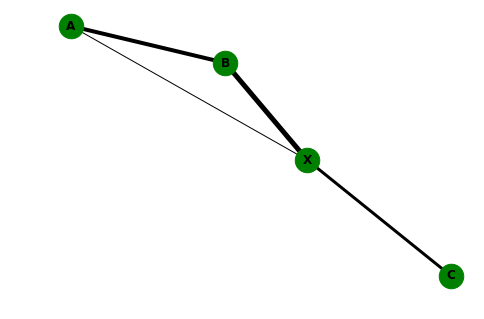

In [100]:
nx.draw(graph,node_color='green',node_size=600, with_labels=True, font_weight='bold',width=weights)

In [82]:
graph.edges()

EdgeView([('X', 'A'), ('X', 'B'), ('X', 'C'), ('A', 'B')])

In [83]:
#G = nx.petersen_graph()
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.subplot(122)
#nx.draw_shell(graph,with_labels=True, font_weight='bold')